#### Install Libraries

In [1]:
import pandas as pd
import numpy as np
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import quandl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load Data from Quandl

In [2]:
# Quandl API Auth
API_KEY = 'vNe88aqJKyem7vKwubjx'
df = quandl.get("WIKI/AAPL", authtoken=API_KEY)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


#### Data Exploration

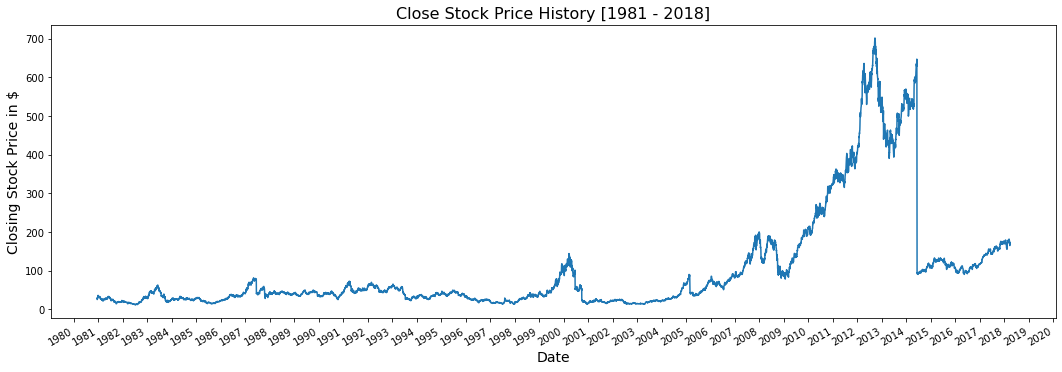

In [4]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

df.reset_index(inplace = True)
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [1981 - 2018]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

#### Feature Engineering

In [5]:
df['HL_PCT']= (df['High']-df['Low'])/df['Low']
df['PCT_change']= (df['Adj. Close']-df['Open'])/df['Open']

In [6]:
# Get descriptive statistics summary of data set 
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07,0.003633,1.000957,21.571019,21.774929,21.351252,21.567664,8.860156e+07,0.033287,-0.847369
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07,0.088269,0.064409,39.272529,39.584888,38.942651,39.271266,8.704777e+07,0.023386,0.279816
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,0.161731,2.503760e+05,0.000000,-0.987032
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06,0.000000,1.000000,0.923453,0.940280,0.904096,0.922730,3.461080e+07,0.017750,-0.969913
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06,0.000000,1.000000,1.437461,1.468272,1.410762,1.437445,6.069700e+07,0.028302,-0.967056
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07,0.000000,1.000000,20.270182,20.565604,19.905845,20.294924,1.109031e+08,0.042373,-0.871624
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,182.590000,183.500000,180.210000,181.720000,1.855410e+09,0.359155,0.052961


In [7]:
drop_cols = ['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']
df.drop(drop_cols, 1, inplace = True)

#### Create Target variable

In [8]:
df['Target']= df['Close'].shift(-1)

In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,HL_PCT,PCT_change,Target
9395,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,0.022364,-0.021538,168.845
9396,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,0.024199,-0.006794,164.940
9397,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,0.030193,-0.020488,172.770
9398,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,0.040014,0.027965,168.340
9399,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,0.049305,-0.030746,NaN


In [10]:
# removing rows with Nan as targets
df = df[df['Target'].notna()]

In [11]:
# Check for missing values in the columns
df.isna().values.any()

False

In [12]:
df.reset_index(inplace = True)
df.drop('Date', 1, inplace = True)

#### Test Train Splits

In [13]:
df_train = df[:9100]
df_test = df[9100:]

In [14]:
Y_train = df_train['Target']
X_train = df_train.drop('Target', 1)

In [15]:
Y_test = df_test['Target']
X_test = df_test.drop('Target', 1)

#### Model Training

In [16]:
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE

In [17]:
ngb = NGBRegressor(n_estimators=4000,
                    Dist=Normal, Score=MLE).fit(X_train.values, np.array(Y_train))
Y_preds = ngb.predict(X_test.values)
Y_dists = ngb.pred_dist(X_test.values)

[iter 0] loss=6.3381 val_loss=0.0000 scale=0.0625 norm=4.7454
[iter 100] loss=6.1708 val_loss=0.0000 scale=0.0625 norm=4.4043
[iter 200] loss=6.0863 val_loss=0.0000 scale=0.0625 norm=4.1221
[iter 300] loss=6.0275 val_loss=0.0000 scale=0.0625 norm=3.8798
[iter 400] loss=5.9801 val_loss=0.0000 scale=0.0625 norm=3.6660
[iter 500] loss=5.9386 val_loss=0.0000 scale=0.0625 norm=3.4735
[iter 600] loss=5.9006 val_loss=0.0000 scale=0.0625 norm=3.2971
[iter 700] loss=5.8648 val_loss=0.0000 scale=0.0625 norm=3.1346
[iter 800] loss=5.8304 val_loss=0.0000 scale=0.0625 norm=2.9834
[iter 900] loss=5.7970 val_loss=0.0000 scale=0.0625 norm=2.8420
[iter 1000] loss=5.7643 val_loss=0.0000 scale=0.0625 norm=2.7093
[iter 1100] loss=5.7321 val_loss=0.0000 scale=0.0625 norm=2.5843
[iter 1200] loss=5.6865 val_loss=0.0000 scale=0.1250 norm=4.8310
[iter 1300] loss=5.6238 val_loss=0.0000 scale=0.1250 norm=4.4031
[iter 1400] loss=5.5616 val_loss=0.0000 scale=0.1250 norm=4.0147
[iter 1500] loss=5.4998 val_loss=0.00

#### Model Evaluation

In [18]:
# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test*1000)
print('Test MSE', test_MSE)

Test MSE 24418795468.917675


In [19]:
# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test*1000).mean()
print('Test NLL', test_NLL)

Test NLL 10089614485.368988


#### Plotting NGboost's probabilistic predictions

In [20]:
obs_idx = [0,1]
Y_test = np.array(Y_test)
dist = ngb.pred_dist(X_test.values)
print('P(y_0|x_0) is normally distributed with loc={:.2f} and scale={:.2f}'.format(dist.loc[0], dist.scale[0]))
print('P(y_1|x_1) is normally distributed with loc={:.2f} and scale={:.2f}'.format(dist.loc[1], dist.scale[1]))

P(y_0|x_0) is normally distributed with loc=118.40 and scale=0.98
P(y_1|x_1) is normally distributed with loc=119.16 and scale=1.13


In [21]:
for i in range(2):
    print(dist.loc[i]), print(dist.scale[i]), print(Y_test[i]), print('----------')

118.39993839189991
0.9845545549852913
120.0
----------
119.15984368007369
1.1284132711582175
119.99
----------


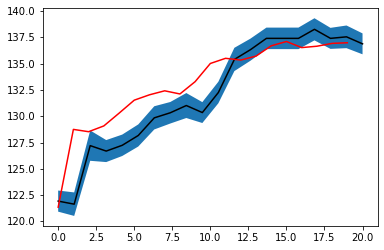

In [22]:
x = np.linspace(0, 20, 20)
y = dist.loc[10:30]
error = dist.scale[10:30]

plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error)
plt.plot(Y_test[10:30], color="red")
plt.show()

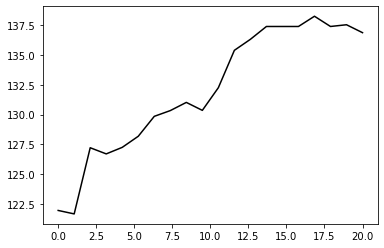

In [23]:
x = np.linspace(0, 20, 20)
y = dist.loc[10:30]
error = dist.scale[10:30]

plt.plot(x, y, 'k-')
plt.show()

---------------------------------------------------------------------------------------------------------------